<a id='top'></a><a name="top"></a>
# Chapter 14 – Deep Computer Vision Using Convolutional Neural Networks

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

1. [Setup](#setup)
2. [The Architecture of the Visual Cortex](#2.0)
3. [Convolutional Layers](#3.0)
    * [3.1 Filters](#3.1)
    * [3.2 Stacking Multiple Feature Maps](#3.2)
    * [3.3 TensorFlow Implementation, Low-level tf.nn API](#3.3)
    * [3.4 TensorFlow Implementation, High-level tf.keras Convolutional Layer API](#3.4)
        - [3.4.1 Memory Requirements](#3.4.1)
    * [3.5 Memory Requirements](#3.5)
4. [Pooling Layers](#4.0)
    * [4.1 TensorFlow Implementation, Max Pooling Keras-API](#4.1)
    * [4.2 TF Low-level Depthwise Max Pooling API](#4.2)
    * [4.3 Depthwise map pooling via Lambda layer](#4.3)
    * [4.4 Average pooling](#4.4)
    * [4.5 Global Average Pooling](#4.5)
5. [CNN Architectures](#5.0)
    * [5.1 LeNet-5](#5.1)
    * [5.2 AlexNet](#5.2)
    * [5.3 GoogLeNet](#5.3)
    * [5.4 VGGNet](#5.4)
    * [5.5 ResNet](#5.5)
    * [5.6 Xception](#5.6)
    * [5.7 SENet](#5.7)
6. [Implementing a Resnet-34 CNN Using Keras](#6.0)
7. [Using Pretrained Models from Keras](#7.0)
8. [Pretrained Models for Transfer Learning](#8.0)
9. [Classification and Localization](#9.0)
10. [Object Detection](#10.0)
    * [10.1 Fully Convolutional Networks](#10.1)
    * [10.2 You Only Look Once (YOLO)](#10.2)
    * [10.3 Mean Average Precision (mAP)](#10.3)
11. [Semantic Segmentation](#11.0)
    * [11.1 Transpose convolutions](#11.1)

---
<a id='setup'></a>
<a name="setup"></a>
# 1. Setup
<a href="#top">[back to top]</a>

In [2]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import pprint
import matplotlib.pyplot as plt

# global seed
tf.random.set_seed(42)
pp = pprint.PrettyPrinter(indent=4)

print("Loaded libraries.")

def HR():
    print("-"*40)

Loaded libraries.


In [5]:
# Utility functions to plot grayscale and RGB images:
# def plot_image(image):
#     plt.imshow(image, cmap="gray", interpolation="nearest")
#     plt.axis("off")

# def plot_color_image(image):
#     plt.imshow(image, interpolation="nearest")
#     plt.axis("off")

---
<a id='2.0'></a>
<a name="2.0"></a>
# 2.0 The Architecture of the Visual Cortex


No source code

<a href="#top">[back to top]</a>

---
<a id='3.0'></a>
<a name="3.0"></a>
# 3.0 Convolutional Layers
<a href="#top">[back to top]</a>

<a id='3.1'></a>
<a name="3.1"></a>
## 3.1 Filters
<a href="#top">[back to top]</a>

No source code

<a id='3.2'></a>
<a name="3.2"></a>
## 3.2 Stacking Multiple Feature Maps
<a href="#top">[back to top]</a>

No source code

<a id='3.3'></a>
<a name="3.3"></a>
## 3.3 TensorFlow Implementation, Low-level tf.nn API
<a href="#top">[back to top]</a>

In general, tf.nn is used for flexibility for custom models, whereas tf.keras is oriented to usability.

Here, when using tf.nn we need to create our own filter tensor and pass it in. This filter will have the shape of:

`[kernel_height, kernel_width, in_channels, num_filters]`


In [6]:
# 1. Load two sample images, using Scikit-Learn load_sample_image().
# 2. Create two filters and apply them to both images.
# 3. Display one of the resulting feature maps.

from sklearn.datasets import load_sample_image
import numpy as np
from dataclasses import dataclass, field

@dataclass(frozen=False)
class DataImg:
    images: np.ndarray = np.array([])
    outputs: tf.Tensor = field(default_factory=tf.Tensor)
    filters: np.ndarray = np.array([])

    
def listing3_3():
    # Load sample images
    china = load_sample_image("china.jpg") / 255
    flower = load_sample_image("flower.jpg") / 255
    images = np.array([china, flower])
    batch_size, height, width, channels = images.shape

    # Manually create two 7x7 filters
    # In a real CNN we normally define filters as trainable variables so the neural net
    # can learn which filters work best.
    filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
    # Arguments: [kernel_height, kernel_width, in_channels, num_filters]
    filters[:, 3, :, 0] = 1  # vertical line
    filters[3, :, :, 1] = 1  # horizontal line
    
    # Computes a 2-D convolution given input and 4-D filters tensors.
    # https://www.tensorflow.org/api_docs/python/tf/nn/conv2d
    # 1. Flattens the filter to a 2-D matrix with shape [filter_height * filter_width * in_channels, output_channels].
    # 2. Extracts image patches from the input tensor to form a virtual tensor of shape [batch, out_height, out_width, filter_height * filter_width * in_channels].
    # 3. For each patch, right-multiplies the filter matrix and the image patch vector.
    outputs = tf.nn.conv2d(
        images, # input mini-batch, a 4D tensor
        filters, # set of filters to apply
        strides=1, # here equal to 1
        padding="SAME" # either same or or valid
    )
    
    return DataImg(
        outputs=outputs,
        images=images,
        filters=filters
    )

data_img = listing3_3()

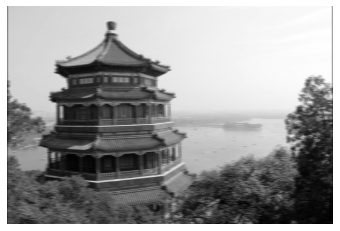

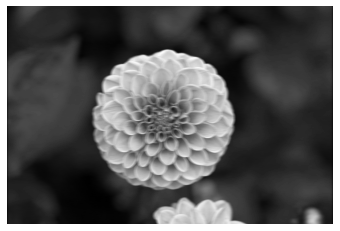

In [7]:
def listing3_3b(outputs):
    
    plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
    plt.axis("off")
    plt.show()
    
    plt.imshow(outputs[1, :, :, 1], cmap="gray") # plot 2nd image's 2nd feature map
    plt.axis("off")
    plt.show()
        
listing3_3b(data_img.outputs)

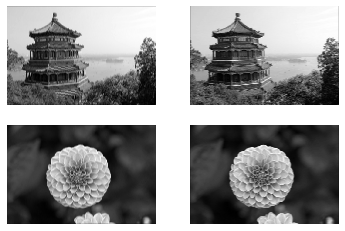

In [8]:
def listing3_3c(outputs):
    
    for image_index in (0, 1):
        for feature_map_index in (0, 1):
            plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)

            plt.imshow(
                outputs[image_index, :, :, feature_map_index],
                cmap="gray", 
                interpolation="nearest"
            )
            plt.axis("off")
    plt.show()
    
listing3_3c(data_img.outputs)

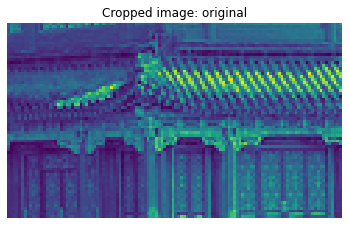

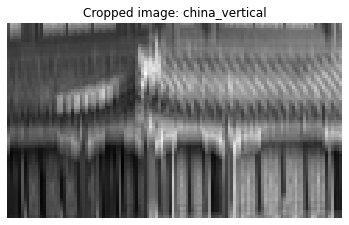

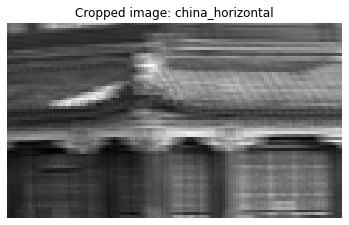

In [9]:
def crop(images):
    return images[150:220, 130:250]
    
def listing3_3d(outputs, images):
    
    plt.imshow(
        crop(images[0, :, :, 0]),
        cmap="viridis",
        interpolation="nearest"
    )
    plt.title("Cropped image: original")
    plt.axis("off")
    plt.show()


    for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
        plt.imshow(
            crop(outputs[0, :, :, feature_map_index]),
            cmap="gray",
            interpolation="nearest"
        )
        plt.title(f"Cropped image: {filename}")
        plt.axis("off")
        plt.show()
        
        
listing3_3d(data_img.outputs, data_img.images)

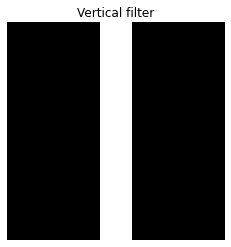

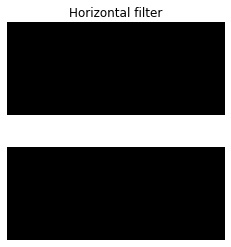

In [10]:
def listing3_3e(outputs, filters):
    
    plt.imshow(
        filters[:, :, 0, 0],
        cmap="gray",
        interpolation="nearest"
    )
    plt.axis("off")
    plt.title("Vertical filter")
    plt.show()
    
    plt.imshow(
        filters[:, :, 0, 1],
        cmap="gray",
        interpolation="nearest"
    )
    plt.axis("off")
    plt.title("Horizontal filter")
    plt.show()

listing3_3e(data_img.outputs, data_img.filters)

<a id='3.4'></a>
<a name="3.4"></a>
## 3.4 TensorFlow Implementation, High-level Convolutional Layer API
<a href="#top">[back to top]</a>

Let's create a 2D convolutional layer, using `keras.layers.Conv2D()`:

Shape of conv_outputs: (2, 427, 640, 2)



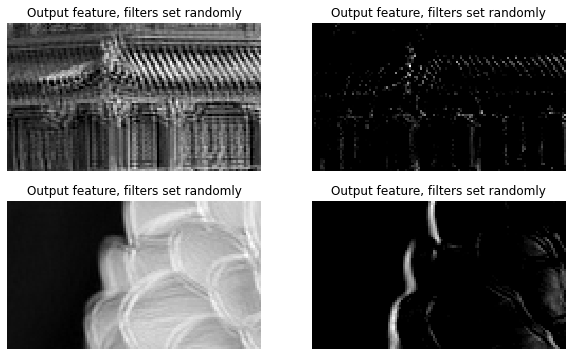


Shape of conv_outputs: (2, 427, 640, 2)



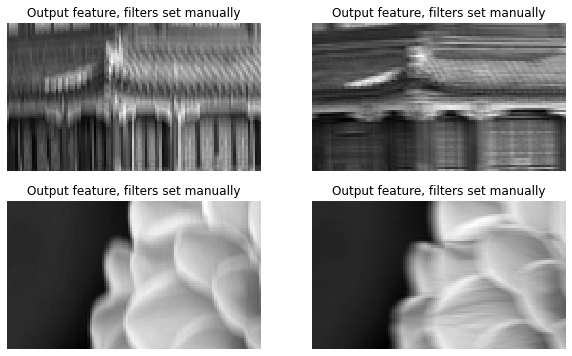

In [11]:
def listing3_4(outputs, filters, images):

    np.random.seed(42)
    tf.random.set_seed(42)

    conv = keras.layers.Conv2D(
        filters=2, 
        kernel_size=7, 
        strides=1,
        padding="SAME", 
        activation="relu", 
        input_shape=outputs.shape
    )
    
    ###
    
    # Let's call this layer, passing it the two test images:
    conv_outputs = conv(images)
    print(f"Shape of conv_outputs: {conv_outputs.shape}\n")
    
    ###
    
    # The output is a 4D tensor. The dimensions are: batch size, height, width, channels. The first dimension (batch size) is 2 since there are 2 input images. The next two dimensions are the height and width of the output feature maps: since padding="SAME" and strides=1, the output feature maps have the same height and width as the input images (in this case, 427×640). Lastly, this convolutional layer has 2 filters, so the last dimension is 2: there are 2 output feature maps per input image.

    # Since the filters are initialized randomly, they'll initially detect random patterns. Let's take a look at the 2 output features maps for each image:

    plt.figure(figsize=(10,6))
    
    for image_index in (0, 1):
        for feature_map_index in (0, 1):
            plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
            plt.imshow(
                crop(conv_outputs[image_index, :, :, feature_map_index]),
                cmap="gray",
                interpolation="nearest"
            )
            plt.title("Output feature, filters set randomly")
            plt.axis("off")

    plt.show()

    
    ###
    
    
    # Although the filters were initialized randomly, the second filter happens to act like an edge detector. Randomly initialized filters often act this way, which is quite fortunate since detecting edges is quite useful in image processing.

    # If we want, we can set the filters to be the ones we manually defined earlier, and set the biases to zeros (in real life we will almost never need to set filters or biases manually, as the convolutional layer will just learn the appropriate filters and biases during training):
    conv.set_weights([filters, np.zeros(2)])
    
    # Now let's call this layer again on the same two images, and let's check that the output feature maps do highlight vertical lines and horizontal lines, respectively (as earlier):
    conv_outputs = conv(images)
    print(f"\nShape of conv_outputs: {conv_outputs.shape}\n")
    
    ###
    
    plt.figure(figsize=(10,6))
    for image_index in (0, 1):
        for feature_map_index in (0, 1):
            plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
            plt.imshow(
                crop(conv_outputs[image_index, :, :, feature_map_index]),
                cmap="gray",
                interpolation="nearest"
            )
            plt.axis("off")
            plt.title("Output feature, filters set manually")

    plt.show()

listing3_4(data_img.outputs, data_img.filters, data_img.images)

<a id='3.4.1'></a>
<a name="3.4.1"></a>
### 3.4.1 VALID vs SAME padding
<a href="#top">[back to top]</a>

In [12]:
def listing3_4_1(images):

    def feature_map_size(input_size, kernel_size, strides=1, padding="SAME"):
        if padding == "SAME":
            return (input_size - 1) // strides + 1
        else:
            return (input_size - kernel_size) // strides + 1

    def pad_before_and_padded_size(input_size, kernel_size, strides=1):
        fmap_size = feature_map_size(input_size, kernel_size, strides)
        padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)
        pad_before = (padded_size - input_size) // 2
        return pad_before, padded_size  

    def manual_same_padding(images, kernel_size, strides=1):
        if kernel_size == 1:
            return images.astype(np.float32)
        batch_size, height, width, channels = images.shape
        top_pad, padded_height = pad_before_and_padded_size(height, kernel_size, strides)
        left_pad, padded_width  = pad_before_and_padded_size(width, kernel_size, strides)
        padded_shape = [batch_size, padded_height, padded_width, channels]
        padded_images = np.zeros(padded_shape, dtype=np.float32)
        padded_images[:, top_pad:height+top_pad, left_pad:width+left_pad, :] = images
        return padded_images
    
    # Using "SAME" padding is equivalent to padding manually using manual_same_padding() then using "VALID" padding (confusingly, "VALID" padding means no padding at all):
    
    kernel_size = 7
    strides = 2

    conv_valid = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="VALID")
    conv_same = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="SAME")

    valid_output = conv_valid(manual_same_padding(images, kernel_size, strides))
    print(type(valid_output))
    HR()
    
    # Need to call build() so conv_same's weights get created
    conv_same.build(tf.TensorShape(images.shape))

    # Copy the weights from conv_valid to conv_same
    conv_same.set_weights(conv_valid.get_weights())
    print(f"conv_same: {conv_same}")
    HR()
    
    same_output = conv_same(images.astype(np.float32))

    print(np.allclose(valid_output.numpy(), same_output.numpy()))
    
    
listing3_4_1(data_img.images)

<class 'tensorflow.python.framework.ops.EagerTensor'>
----------------------------------------
conv_same: <keras.layers.convolutional.Conv2D object at 0x7fb0d6056650>
----------------------------------------
True


<a id='3.5'></a>
<a name="3.5"></a>
## 3.5 Memory Requirements
<a href="#top">[back to top]</a>

No source code

---
<a id='4.0'></a>
<a name="4.0"></a>
# 4.0 Pooling Layers
<a href="#top">[back to top]</a>

<a id='4.1'></a>
<a name="4.1"></a>
## 4.1 TensorFlow Implementation, Max Pooling
<a href="#top">[back to top]</a>

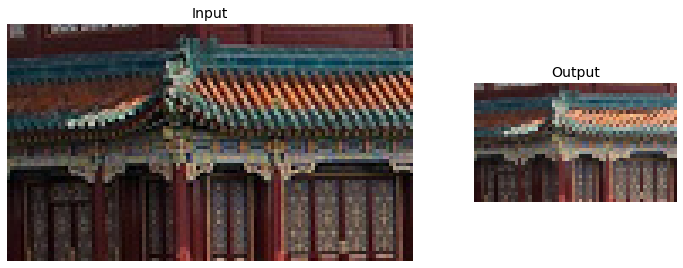

In [13]:
def listing4_1(images):
    max_pool = keras.layers.MaxPool2D(pool_size=2)

    cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
    output = max_pool(cropped_images)

    fig = plt.figure(figsize=(12, 8))
    gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title("Input", fontsize=14)
    ax1.imshow(cropped_images[0])  # plot the 1st image
    ax1.axis("off")
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title("Output", fontsize=14)
    ax2.imshow(output[0])  # plot the output for the 1st image
    ax2.axis("off")
    plt.show()
    
listing4_1(data_img.images)

<a id='4.2'></a>
<a name="4.2"></a>
## 4.2 TF Low-level Deep Learning API, Depthwise map pooling
<a href="#top">[back to top]</a>

(2, 70, 120, 1)


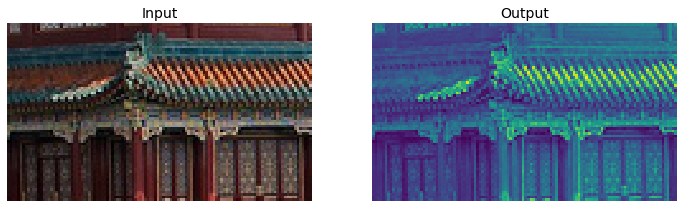

In [14]:
# Keras does not have a depthwise max pooling layer, but the 
# low-level TF Deep Learning API does. 
# Use the tf.nn.max_pool() function and specify the kernel size and strides
# as 4-tuples (eg tuples of size 4)

def listing4_2(images):

    class DepthMaxPool(keras.layers.Layer):

        def __init__(self, pool_size, strides=None, padding="VALID", **kwargs):
            super().__init__(**kwargs)
            if strides is None:
                strides = pool_size
            self.pool_size = pool_size
            self.strides = strides
            self.padding = padding

        def call(self, inputs):
            return tf.nn.max_pool(
                inputs,
                ksize=(1, 1, 1, self.pool_size),
                strides=(1, 1, 1, self.pool_size),
                padding=self.padding
            )

    max_pool = keras.layers.MaxPool2D(pool_size=2)
    cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
    output = max_pool(cropped_images)
        
    depth_pool = DepthMaxPool(3)
    with tf.device("/cpu:0"): # there is no GPU-kernel yet
        depth_output = depth_pool(cropped_images)
    
    print(depth_output.shape)
    
    ###
    
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.title("Input", fontsize=14)
    
    # plot the 1st image
    plt.imshow(
        cropped_images[0],
        cmap="viridis",
        interpolation="nearest"
    )
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Output", fontsize=14)
    # plot the 1st image
    plt.imshow(
        depth_output[0, ..., 0],
        cmap="viridis",
        interpolation="nearest"
    )
    plt.axis("off")
    
    plt.show()

listing4_2(data_img.images)

<a id='4.3'></a>
<a name="4.3"></a>
## 4.3 Depthwise map pooling via Lambda layer
<a href="#top">[back to top]</a>

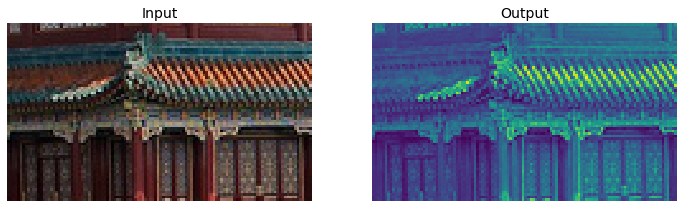

In [15]:
# We can also just a Lambda layer:

def listing4_3(images):
        
    max_pool = keras.layers.MaxPool2D(pool_size=2)
    cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
    output = max_pool(cropped_images)
        
    depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(
        X, ksize=(1, 1, 1, 3), 
        strides=(1, 1, 1, 3), 
        padding="VALID")
    )
    with tf.device("/cpu:0"): # there is no GPU-kernel yet
        depth_output = depth_pool(cropped_images)
    depth_output.shape

    ###
    
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.title("Input", fontsize=14)
    
    # plot the 1st image
    plt.imshow(
        cropped_images[0],
        cmap="viridis",
        interpolation="nearest"
    )
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Output", fontsize=14)
    # plot the 1st image
    plt.imshow(
        depth_output[0, ..., 0],
        cmap="viridis",
        interpolation="nearest"
    )
    plt.axis("off")
    
    plt.show()

listing4_3(data_img.images)

<a id='4.4'></a>
<a name="4.4"></a>
## 4.4 Average pooling
<a href="#top">[back to top]</a>

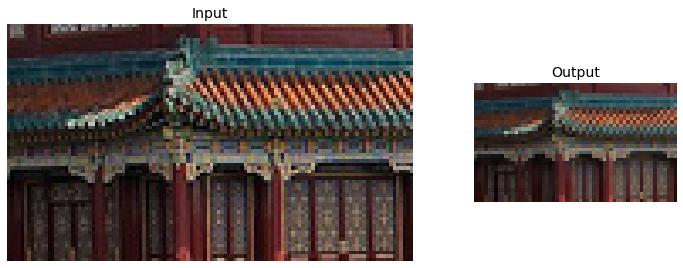

In [16]:
def listing4_4(images):
        
    max_pool = keras.layers.MaxPool2D(pool_size=2)
    cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
    
    avg_pool = keras.layers.AvgPool2D(pool_size=2)
    output_avg = avg_pool(cropped_images)
    
    ###
    
    fig = plt.figure(figsize=(12, 8))
    gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title("Input", fontsize=14)
    ax1.imshow(cropped_images[0])  # plot the 1st image
    ax1.axis("off")
    
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title("Output", fontsize=14)
    ax2.imshow(output_avg[0])  # plot the output for the 1st image
    ax2.axis("off")
    plt.show()

listing4_4(data_img.images)

<a id='4.5'></a>
<a name="4.5"></a>
## 4.5 Global Average Pooling
<a href="#top">[back to top]</a>

global_avg_pool:
tf.Tensor(
[[0.2788777  0.22507192 0.20967275]
 [0.51288515 0.45951638 0.33423486]], shape=(2, 3), dtype=float32)


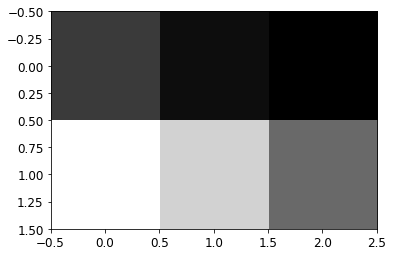

----------------------------------------
output_global_avg2:
tf.Tensor(
[[0.2788777  0.22507192 0.20967275]
 [0.51288515 0.45951638 0.33423486]], shape=(2, 3), dtype=float32)


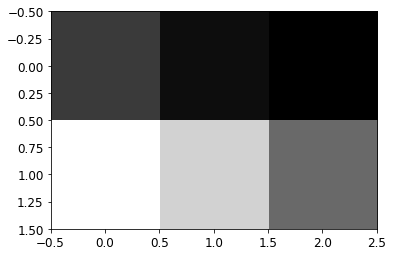

In [17]:
def listing4_5(images):
        
    cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
    
    global_avg_pool = keras.layers.GlobalAvgPool2D()
    print("global_avg_pool:")
    print(global_avg_pool(cropped_images))

    plt.imshow(
        global_avg_pool(cropped_images), 
        cmap='gray'
    )
    plt.show()
    
    HR()
            
    output_global_avg2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))
    print("output_global_avg2:")
    print(output_global_avg2(cropped_images))

    plt.imshow(
        output_global_avg2(cropped_images), 
        cmap='gray'
    )
    
    plt.show()

listing4_5(data_img.images)

---
<a id='5.0'></a>
<a name="5.0"></a>
# 5.0 CNN Architectures
<a href="#top">[back to top]</a>

**Simple CNN to tackle the Fashion MNIST dataset**

In [18]:
from dataclasses import dataclass, field

@dataclass(frozen=True)
class DataMnist:
    X_train: np.ndarray = np.array([])
    X_valid: np.ndarray = np.array([])
    X_test: np.ndarray = np.array([])
    y_train: np.ndarray = np.array([])
    y_valid: np.ndarray = np.array([])
    y_test: np.ndarray = np.array([])
    X_mean: np.ndarray = np.array([])
    X_std: np.ndarray = np.array([])
    y_labels: list = field(default_factory=list)
            
def listing5_0_data():
    
    (X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
    X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
    y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

    X_mean = X_train.mean(axis=0, keepdims=True)
    X_std = X_train.std(axis=0, keepdims=True) + 1e-7
    
    X_train = (X_train - X_mean) / X_std
    X_valid = (X_valid - X_mean) / X_std
    X_test = (X_test - X_mean) / X_std

    X_train = X_train[..., np.newaxis]
    X_valid = X_valid[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    return DataMnist(
        X_train=X_train,
        X_valid=X_valid,
        X_test=X_test,
        y_train=y_train,
        y_valid=y_valid,
        y_test=y_test,
        X_mean=X_mean,
        X_std=X_std,
        y_labels=y_labels
    )
    
data_mnist = listing5_0_data()

4431872/4422102 [==============================] - 0s 0us/step


In [19]:
print(data_mnist.y_test)

[9 2 1 ... 8 1 5]


In [20]:
def listing5_0():

    model = keras.models.Sequential([
        # Use 64 large filter (7x7), but no stride because the input images are not big.
        # Input shape is [28,28,1] with a single color channel (grayscale)
        keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="same", input_shape=[28,28,1]),
        # Use a pool size of 2, so it divides each spatial dimension by a factor of 2
        keras.layers.MaxPooling2D(pool_size=2),
        
        # The number of filters grows as we progress to the output layer.
        # This is because the number of low-level features of low (eg small circles, horizontal lines),
        # but there are many different ways to combine them in higher-level features.
        # It is common-practice to double the number of filters after each pooling layer,
        # since a pooling layer divides each spatial dimension by a factor of 2.
        keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
        keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(pool_size=2),
        
        keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
        keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(pool_size=2),
        
        # Fully connected network.
        # We have to first flatten the inputs, since a dense network expects a 1D array of features
        keras.layers.Flatten(),
        keras.layers.Dense(units=128, activation='relu'),
        # Add dropout layers with rate of 50% to reduce overfitting
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=10, activation='softmax'),
    ])
    
    # This takes time to run!

    model.compile(
        loss="sparse_categorical_crossentropy", 
        optimizer="nadam", 
        metrics=["accuracy"]
    )
    
    print(model.summary())
    
    return model

model_mnist = listing5_0()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         2

In [21]:
def listing5_0_fit(model, data):
    
    history = model.fit(
        data.X_train, 
        data.y_train, 
        epochs=1, 
        #epochs=10, 
        validation_data=(data.X_valid, data.y_valid)
    )
    HR()

    score = model.evaluate(data.X_test, data.y_test)
    print(f"model evaluation: {score}")
    HR()

    return model

model_mnist_fit = listing5_0_fit(model_mnist, data_mnist)

1719/1719 [==============================] - 19s 9ms/step - loss: 0.7098 - accuracy: 0.7499 - val_loss: 0.3755 - val_accuracy: 0.8682
----------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.3921 - accuracy: 0.8581
model evaluation: [0.3921193480491638, 0.8580999970436096]
----------------------------------------


In [22]:
def listing5_0_predict_single(model, data):

    # Grab an image from the test dataset.
    test_image=976
    
    img = data.X_test[test_image]
    print(img.shape) # (28, 28, 1)
    HR()
    
    # Add the image to a batch where it's the only member.
    img = (np.expand_dims(img,0))
    print(img.shape) # (1, 28, 28, 1)
    HR()
    
    predictions_single = model.predict(img)
    print(predictions_single)
    HR()
    
    pick = np.argmax(predictions_single[0])
    print(pick)
    HR()
    
    print(data.y_labels[pick])
    HR()
    
        
listing5_0_predict_single(model_mnist_fit, data_mnist)

(28, 28, 1)
----------------------------------------
(1, 28, 28, 1)
----------------------------------------
[[1.2012033e-03 1.5891436e-04 9.8195635e-02 1.4157697e-03 4.9551558e-01
  1.0377426e-04 3.9909056e-01 5.1307354e-05 4.1897800e-03 7.7487763e-05]]
----------------------------------------
4
----------------------------------------
Coat
----------------------------------------


<a id='5.1'></a>
<a name="5.1"></a>
## 5.1 LeNet-5
<a href="#top">[back to top]</a>

No source code

<a id='5.2'></a>
<a name="5.2"></a>
## 5.2 AlexNet
<a href="#top">[back to top]</a>

No source code

<a id='5.3'></a>
<a name="5.3"></a>
## 5.3 GoogLeNet
<a href="#top">[back to top]</a>

No source code

<a id='5.4'></a>
<a name="5.4"></a>
## 5.4 VGGNet
<a href="#top">[back to top]</a>

No source code

<a id='5.5'></a>
<a name="5.5"></a>
## 5.5 ResNet
<a href="#top">[back to top]</a>

No source code

<a id='5.6'></a>
<a name="5.6"></a>
## 5.6 Xception
<a href="#top">[back to top]</a>

No source code

<a id='5.7'></a>
<a name="5.7"></a>
## 5.7 SENet
<a href="#top">[back to top]</a>

No source code

---
<a id='6.0'></a>
<a name="6.0"></a>
# 6.0 Implementing a ResNet-34 Using Keras
<a href="#top">[back to top]</a>

In [23]:
def listing6_0():

    # Implement ResidualUnit layer:
    class ResidualUnit(keras.layers.Layer):

        def __init__(self, filters, strides=1, activation="relu", **kwargs):
            super().__init__(**kwargs)
            self.activation = keras.activations.get(activation)
            self.main_layers = [
                keras.layers.Conv2D(filters, 3, strides=strides, padding="same", use_bias=False),
                keras.layers.BatchNormalization(),
                self.activation,
                keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),
                keras.layers.BatchNormalization()]
            self.skip_layers = []
            if strides > 1:
                self.skip_layers = [
                    keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),
                    keras.layers.BatchNormalization()]

        def call(self, inputs):
            Z = inputs
            for layer in self.main_layers:
                Z = layer(Z)
            skip_Z = inputs
            for layer in self.skip_layers:
                skip_Z = layer(skip_Z)
            return self.activation(Z + skip_Z)
        
    
    # Build the ResNet-34 using a Sequential model
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224,224,3], padding="same", use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))

    prev_filters = 64

    for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
        strides = 1 if filters == prev_filters else 2
        model.add(ResidualUnit(filters, strides=strides))
        prev_filters = filters

    model.add(keras.layers.GlobalAvgPool2D())
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation="softmax"))
        
    model.summary()
    
listing6_0()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      9408      
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 residual_unit (ResidualUnit  (None, 56, 56, 64)       74240     
 )                                                               
                                                      

---
<a id='7.0'></a>
<a name="7.0"></a>
# 7.0 Using Pretrained Models from Keras
<a href="#top">[back to top]</a>

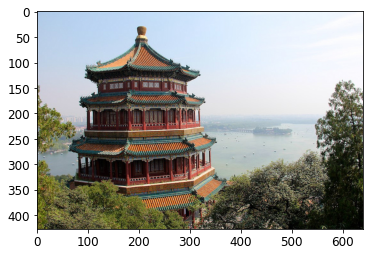

102981632/102967424 [==============================] - 1s 0us/step


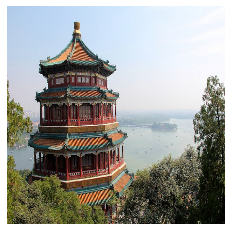

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


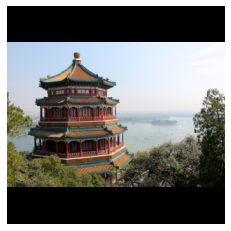

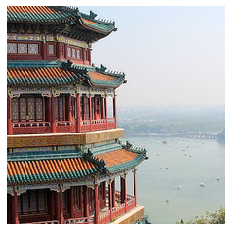

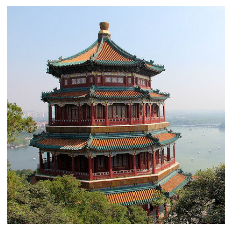

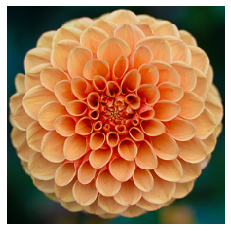

(2, 1000)
49152/35363 [=========================================] - 0s 0us/step
Image #0
  n03877845 - palace       43.39%
  n02825657 - bell_cote    43.07%
  n03781244 - monastery    11.70%

Image #1
  n04522168 - vase         53.96%
  n07930864 - cup          9.52%
  n11939491 - daisy        4.97%



In [24]:
def listing7_0():
    
    from sklearn.datasets import load_sample_image

    # Load sample images
    china = load_sample_image("china.jpg") / 255
    flower = load_sample_image("flower.jpg") / 255
    images = np.array([china, flower])

    
    plt.imshow(images[0])
    plt.show()
    
    model = keras.applications.resnet50.ResNet50(
        weights="imagenet"
    )

    images_resized = tf.image.resize(images, [224, 224])
    plt.imshow(
        images_resized[0],
        interpolation="nearest"
    )
    plt.axis("off")
    plt.show()  
    
    images_resized = tf.image.resize_with_pad(images, 224, 224, antialias=True)
    plt.imshow(
        images_resized[0],
        interpolation="nearest"
    )
    plt.axis("off")
    plt.show()
    
    images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)
    plt.imshow(
        images_resized[0],
        interpolation="nearest"
    )
    plt.axis("off")
    plt.show()
    
    
    china_box = [0, 0.03, 1, 0.68]
    flower_box = [0.19, 0.26, 0.86, 0.7]
    images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
    plt.imshow(
        images_resized[0],
        interpolation="nearest"
    )
    plt.axis("off")
    plt.show()
    
    plt.imshow(
        images_resized[1],
        interpolation="nearest"
    )
    plt.axis("off")
    plt.show()
        

    # https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
    # Preprocessed numpy.array or a tf.Tensor with type float32.
    # The images are converted from RGB to BGR, then each color channel is zero-centered with 
    # respect to the ImageNet dataset, without scaling. 
    inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)
    Y_proba = model.predict(inputs)
    
    print(Y_proba.shape)
    
    top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)

    for image_index in range(len(images)):
        print("Image #{}".format(image_index))
        for class_id, name, y_proba in top_K[image_index]:
            print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
        print()
    
listing7_0()

---
<a id='8.0'></a>
<a name="8.0"></a>
# 8.0 Pretrained Models for Transfer Learning

If we don't have enough training data, but still want to build an image classifier, we can reuse the lower layers of a pretrained model.

Here we train a model to classify pictures of flower, reusing a pretrained Xception model.

<a href="#top">[back to top]</a>

In [25]:
from dataclasses import dataclass, field

@dataclass(frozen=False)
class DataFlowers:
    train_set_raw: tf.Tensor = field(default_factory=tf.Tensor)
    valid_set_raw: tf.Tensor = field(default_factory=tf.Tensor)
    test_set_raw: tf.Tensor = field(default_factory=tf.Tensor)

    train_set: tf.Variable = tf.Variable(0)
    valid_set: tf.Variable = tf.Variable(0)
    test_set: tf.Variable = tf.Variable(0)

    class_names: list = field(default_factory=list)
    n_classes: int = field(default_factory=int)
    dataset_size: int = field(default_factory=int)

    batch_size: int = field(default_factory=int)
    X_train: np.ndarray = np.array([])
    y_labels: list = field(default_factory=list)
        
        
def listing8_0_dataset():
    
    import tensorflow_datasets as tfds

    dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

    print(info.splits)
    print(info.splits["train"])
    HR()
    
    class_names = info.features["label"].names
    print(class_names)
    print(type(class_names))
    HR()

    n_classes = info.features["label"].num_classes
    print("n_classes:", type(n_classes))
    
    dataset_size = info.splits["train"].num_examples
    print("dataset_size:", type(dataset_size))
    print(dataset_size)
    HR()
    
    
    # Warning: TFDS's split API has evolved since the book was published. 
    # https://www.tensorflow.org/datasets/splits
    # The new split API (called S3) is much simpler to use:
    test_set_raw, valid_set_raw, train_set_raw = tfds.load(
        "tf_flowers",
        split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
        as_supervised=True
    )    
        
    return DataFlowers(
        train_set_raw=train_set_raw,
        valid_set_raw=valid_set_raw,
        test_set_raw=test_set_raw,
        class_names=class_names,
        n_classes=n_classes,
        dataset_size=dataset_size,
        batch_size=32
    )
    
data_flowers = listing8_0_dataset()

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
{'train': <tfds.core.SplitInfo num_examples=3670>}
<tfds.core.SplitInfo num_examples=3670>
----------------------------------------
['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
<class 'list'>
----------------------------------------
n_classes: <class 'int'>
dataset_size: <class 'int'>
3670
----------------------------------------


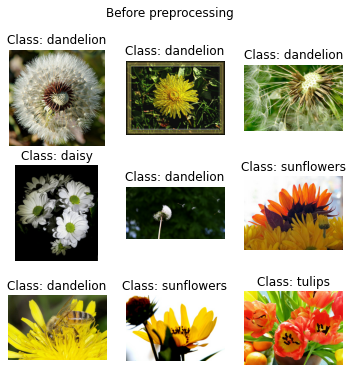

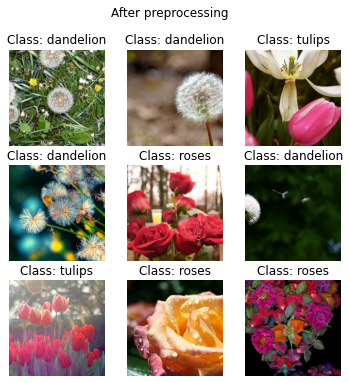

Load an Xception model, pretrained on ImageNet

83697664/83683744 [==============================] - 0s 0us/step
dataset size: 3670
----------------------------------------
steps per epoch: 86
----------------------------------------
validation steps: 17
----------------------------------------
Epoch 1/5
86/86 [==============================] - 18s 155ms/step - loss: 1.4720 - accuracy: 0.7925 - val_loss: 1.4752 - val_accuracy: 0.8070
Epoch 2/5
86/86 [==============================] - 13s 147ms/step - loss: 0.6576 - accuracy: 0.8914 - val_loss: 0.9815 - val_accuracy: 0.8732
Epoch 3/5
86/86 [==============================] - 13s 150ms/step - loss: 0.3623 - accuracy: 0.9248 - val_loss: 0.8554 - val_accuracy: 0.8732
Epoch 4/5
86/86 [==============================] - 13s 153ms/step - loss: 0.2582 - accuracy: 0.9335 - val_loss: 0.7072 - val_accuracy: 0.8842
Epoch 5/5
86/86 [==============================] - 13s 154ms/step - loss: 0.2029 - accuracy: 0.9440 - val_loss: 0.7266 - val_accuracy: 0

In [26]:
def listing8_0(data):
    
    from functools import partial
    
    ###
    
    plt.figure(figsize=(6, 6))
    index = 0
    for image, label in data.train_set_raw.take(9):
        index += 1
        plt.subplot(3, 3, index)
        plt.imshow(image)
        plt.title("Class: {}".format(data.class_names[label]))
        plt.axis("off")
    plt.suptitle('Before preprocessing')
    plt.show()
    
    ###
    
    # Basic preprocessing
    def preprocess(image, label):
        resized_image = tf.image.resize(image, [224, 224])
        final_image = keras.applications.xception.preprocess_input(resized_image)
        return final_image, label
    
    
    # Slightly fancier preprocessing (but you could add much more data augmentation):
    def central_crop(image):
        shape = tf.shape(image)
        min_dim = tf.reduce_min([shape[0], shape[1]])
        top_crop = (shape[0] - min_dim) // 4
        bottom_crop = shape[0] - top_crop
        left_crop = (shape[1] - min_dim) // 4
        right_crop = shape[1] - left_crop
        return image[top_crop:bottom_crop, left_crop:right_crop]

    def random_crop(image):
        shape = tf.shape(image)
        min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
        return tf.image.random_crop(image, [min_dim, min_dim, 3])

    def preprocess(image, label, randomize=False):
        if randomize:
            cropped_image = random_crop(image)
            cropped_image = tf.image.random_flip_left_right(cropped_image)
        else:
            cropped_image = central_crop(image)
        resized_image = tf.image.resize(cropped_image, [224, 224])
        final_image = keras.applications.xception.preprocess_input(resized_image)
        return final_image, label

    batch_size = data.batch_size
    
    train_set = data.train_set_raw.shuffle(1000).repeat()
    
    train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
    
    valid_set = data.valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
    
    test_set = data.test_set_raw.map(preprocess).batch(batch_size).prefetch(1)
    
    ###
    
    data_flowers.train_set = train_set
    data_flowers.valid_set = valid_set
    data_flowers.test_set = test_set
    
    
    ###

    plt.figure(figsize=(6, 6))
    for X_batch, y_batch in train_set.take(1):
        for index in range(9):
            plt.subplot(3, 3, index + 1)
            plt.imshow(X_batch[index] / 2 + 0.5)
            plt.title("Class: {}".format(data.class_names[y_batch[index]]))
            plt.axis("off")
    plt.suptitle('After preprocessing')
    plt.show()
    
    ###

    
    
    # Load an Xception model, pretrained on ImageNet
    print("Load an Xception model, pretrained on ImageNet\n")
    base_model = keras.applications.xception.Xception(
        weights="imagenet",
        include_top=False
    )
    avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
    output = keras.layers.Dense(data.n_classes, activation="softmax")(avg)
    model = keras.models.Model(inputs=base_model.input, outputs=output)

    
    # Freeze the weights of the pretrained layers, at least at the beginning of training
    # print("Layers:")
    # for index, layer in enumerate(base_model.layers):
    #     print(index, layer.name)
    
    for layer in base_model.layers:
        layer.trainable = False

    optimizer = keras.optimizers.SGD(
        learning_rate=0.2, 
        momentum=0.9, 
        decay=0.01
    )
    
    model.compile(
        loss="sparse_categorical_crossentropy", 
        optimizer=optimizer,
        metrics=["accuracy"]
    )
    
    print(f"dataset size: {data.dataset_size}")
    HR()
    
    # Number of batches generated during one epoch
    # Equal to the number of unique samples of your dataset divided by the batch size ??
    steps_per_epoch = int(0.75 * data.dataset_size / batch_size)
    print(f"steps per epoch: {steps_per_epoch}")
    HR()
    
    validation_steps = int(0.15 * data.dataset_size / batch_size)
    print(f"validation steps: {validation_steps}")
    HR()
    
    history = model.fit(
        train_set,
        steps_per_epoch=steps_per_epoch,
        validation_data=valid_set,
        validation_steps=validation_steps,
        epochs= 5   # epochs=1
    )
    
    return model, base_model

    
model_part1, base_model = listing8_0(data_flowers)

In [27]:
def listing8_0_final(data, model, base_model):
    
    print(f"dataset size: {data.dataset_size}")
    HR()
    
    for layer in base_model.layers:
        layer.trainable = True

    optimizer = keras.optimizers.SGD(
        learning_rate=0.01, 
        momentum=0.9,
        nesterov=True, 
        decay=0.001
    )
    
    model.compile(
        loss="sparse_categorical_crossentropy", 
        optimizer=optimizer,
        metrics=["accuracy"]
    )
    
    history = model.fit(
        data.train_set,
        steps_per_epoch=int(0.75 * data.dataset_size / data.batch_size),
        validation_data=data.valid_set,
        validation_steps=int(0.15 * data.dataset_size / data.batch_size),
        epochs=40 # 1  # 40
    )
    
listing8_0_final(data_flowers, model_part1, base_model)

dataset size: 3670
----------------------------------------
Epoch 1/40
86/86 [==============================] - 61s 646ms/step - loss: 0.3497 - accuracy: 0.8855 - val_loss: 0.6077 - val_accuracy: 0.8327
Epoch 2/40
86/86 [==============================] - 54s 628ms/step - loss: 0.1210 - accuracy: 0.9586 - val_loss: 0.3689 - val_accuracy: 0.8860
Epoch 3/40
86/86 [==============================] - 54s 632ms/step - loss: 0.0643 - accuracy: 0.9807 - val_loss: 0.3128 - val_accuracy: 0.9062
Epoch 4/40
86/86 [==============================] - 54s 631ms/step - loss: 0.0592 - accuracy: 0.9836 - val_loss: 0.3317 - val_accuracy: 0.9044
Epoch 5/40
86/86 [==============================] - 54s 629ms/step - loss: 0.0351 - accuracy: 0.9869 - val_loss: 0.3195 - val_accuracy: 0.9154
Epoch 6/40
86/86 [==============================] - 54s 630ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.3148 - val_accuracy: 0.9228
Epoch 7/40
86/86 [==============================] - 54s 629ms/step - loss: 0.0187 

In [28]:
from dataclasses import dataclass, fields
for field in fields(data_flowers):
    print(field.name, getattr(data_flowers, field.name))

train_set_raw <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
valid_set_raw <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
test_set_raw <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
train_set <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
valid_set <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
test_set <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
class_names ['dandelion', 'daisy', 'tul

---
<a id='9.0'></a>
<a name="9.0"></a>
# 9.0 Classification and Localization
<a href="#top">[back to top]</a>

In [29]:
def listing9_0(data):

    base_model = keras.applications.xception.Xception(
        weights="imagenet",
        include_top=False
    )

    avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
    
    class_output = keras.layers.Dense(data.n_classes, activation="softmax")(avg)
    
    loc_output = keras.layers.Dense(4)(avg)
    
    model = keras.models.Model(
        inputs=base_model.input,
        outputs=[class_output, loc_output]
    )
    
    optimizer = keras.optimizers.SGD(
        learning_rate=0.01, 
        momentum=0.9,
        nesterov=True, 
        decay=0.001
    )

    model.compile(
        loss=["sparse_categorical_crossentropy", "mse"],
        loss_weights=[0.8, 0.2], # depends on what you care most about
        optimizer=optimizer, metrics=["accuracy"]
    )

    def add_random_bounding_boxes(images, labels):
        fake_bboxes = tf.random.uniform([tf.shape(images)[0], 4])
        return images, (labels, fake_bboxes)

    fake_train_set = data.train_set.take(5).repeat(2).map(add_random_bounding_boxes)

    model.fit(
        fake_train_set, 
        steps_per_epoch=5, 
        epochs=2
    )
    
listing9_0(data_flowers)

Epoch 1/2
5/5 [==============================] - 7s 588ms/step - loss: 1.3338 - dense_5_loss: 1.5809 - dense_6_loss: 0.3456 - dense_5_accuracy: 0.2125 - dense_6_accuracy: 0.2188
Epoch 2/2
5/5 [==============================] - 3s 603ms/step - loss: 1.1115 - dense_5_loss: 1.3386 - dense_6_loss: 0.2028 - dense_5_accuracy: 0.5688 - dense_6_accuracy: 0.2688


---
<a id='10.0'></a>
<a name="10.0"></a>
# 10.0 Object Detection
<a href="#top">[back to top]</a>

The task of classifying and localizing muliple objects in an image is called object detection.

<a id='10.1'></a>
<a name="10.1"></a>
## 10.1 Fully Convolutional Networks
<a href="#top">[back to top]</a>

This is an object detection architecture that is very efficient since the network only looks at the image once.

No source code.

<a id='10.2'></a>
<a name="10.2"></a>
## 10.2 You Only Look Once (YOLO)
<a href="#top">[back to top]</a>

This is a fast and accurate detection architecture. It is so fast that it can run in real time on video data.

No source code.

<a id='10.3'></a>
<a name="10.3"></a>
## 10.3 Mean Average Precision (mAP)
<a href="#top">[back to top]</a>

This is a very common metric used in object detection, that attempts to average precision and recall.

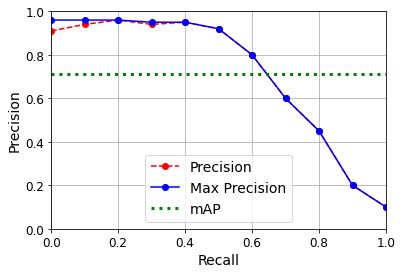

In [34]:
def listing10_3():

    def maximum_precisions(precisions):
        return np.flip(np.maximum.accumulate(np.flip(precisions)))
    
    recalls = np.linspace(0, 1, 11)

    precisions = [0.91, 0.94, 0.96, 0.94, 0.95, 0.92, 0.80, 0.60, 0.45, 0.20, 0.10]
    max_precisions = maximum_precisions(precisions)
    mAP = max_precisions.mean()
    plt.plot(recalls, precisions, "ro--", label="Precision")
    plt.plot(recalls, max_precisions, "bo-", label="Max Precision")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.plot([0, 1], [mAP, mAP], "g:", linewidth=3, label="mAP")
    plt.grid(True)
    plt.axis([0, 1, 0, 1])
    plt.legend(loc="lower center", fontsize=14)
    plt.show()

listing10_3()

<a id='11.0'></a>
<a name="11.0"></a>
# 11.0 Semantic Segmentation
<a href="#top">[back to top]</a>

<a id='11.1'></a>
<a name="11.1"></a>
## 11.1 Transpose convolutions
<a href="#top">[back to top]</a>

In [61]:
def listing11_1():

    from sklearn.datasets import load_sample_image

    # Load sample images
    china = load_sample_image("china.jpg") / 255
    flower = load_sample_image("flower.jpg") / 255
    images = np.array([china, flower])
    
    images_resized = tf.image.resize(images, [224, 224])

    tf.random.set_seed(42)
    X = images_resized.numpy()

    conv_transpose = keras.layers.Conv2DTranspose(filters=5, kernel_size=3, strides=2, padding="VALID")
    output = conv_transpose(X)

    return X, output, conv_transpose

X, output, conv_transpose = listing11_1()

print(X.shape)
print(output.shape)

(2, 224, 224, 3)
(2, 449, 449, 5)


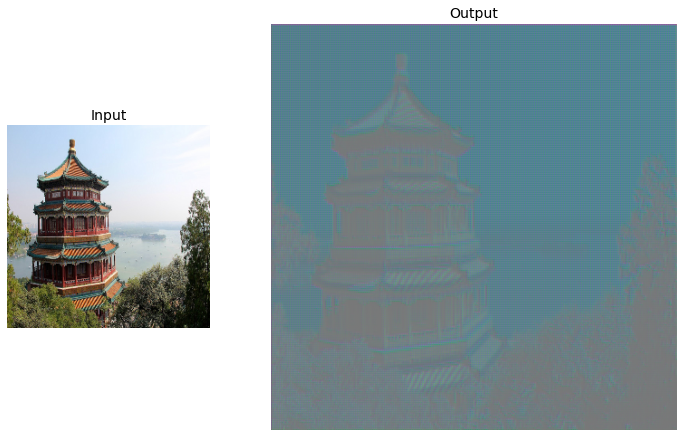

In [72]:
def listing11_1b(X):

    def normalize(X):
        return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))

    fig = plt.figure(figsize=(12, 8))
    gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title("Input", fontsize=14)
    ax1.imshow(X[0])  # plot the 1st image
    ax1.axis("off")
    
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title("Output", fontsize=14)
    ax2.imshow(normalize(output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image
    ax2.axis("off")
    plt.show()

listing11_1b(X)

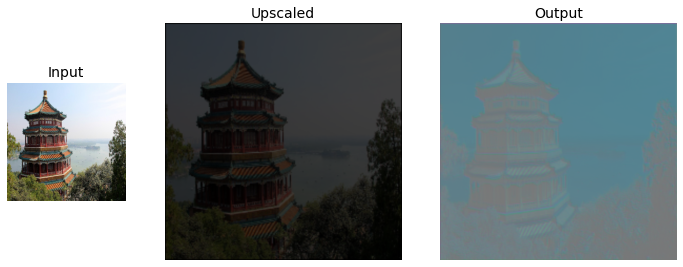

True


In [73]:
def listing11_1c(conv_transpose, X):
        
    def upscale_images(images, stride, kernel_size):
        batch_size, height, width, channels = images.shape
        upscaled = np.zeros((batch_size,
                            (height - 1) * stride + 2 * kernel_size - 1,
                            (width - 1) * stride + 2 * kernel_size - 1,
                            channels))
        upscaled[:,
                kernel_size - 1:(height - 1) * stride + kernel_size:stride,
                kernel_size - 1:(width - 1) * stride + kernel_size:stride,
                :] = images
        return upscaled

    ###

    upscaled = upscale_images(X, stride=2, kernel_size=3)
    weights, biases = conv_transpose.weights
    reversed_filters = np.flip(weights.numpy(), axis=[0, 1])
    reversed_filters = np.transpose(reversed_filters, [0, 1, 3, 2])
    manual_output = tf.nn.conv2d(upscaled, reversed_filters, strides=1, padding="VALID")

    ###

    def normalize(X):
        return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))

    fig = plt.figure(figsize=(12, 8))
    gs = mpl.gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[1, 2, 2])

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title("Input", fontsize=14)
    ax1.imshow(X[0])  # plot the 1st image
    ax1.axis("off")
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title("Upscaled", fontsize=14)
    ax2.imshow(upscaled[0], interpolation="bicubic")
    ax2.axis("off")
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.set_title("Output", fontsize=14)
    ax3.imshow(normalize(manual_output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image
    ax3.axis("off")
    plt.show()

    ###

    print(
        np.allclose(output, manual_output.numpy(), atol=0.0000001) # 1e-7 
    )

listing11_1c(conv_transpose, X)